<a href="https://colab.research.google.com/github/LucasChomyszak/Computer_Vision/blob/main/CvLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


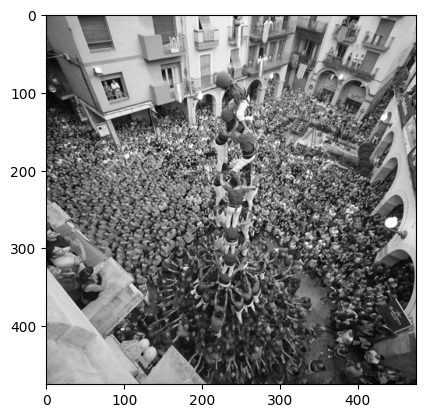

In [36]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import img_as_ubyte


image=sk.io.imread('/content/castellers-costa-daurada.jpg')

image_gray=rgb2gray(image)

image_gray=img_as_ubyte(image_gray)


fig=plt.figure()
plt.imshow(image_gray,cmap=plt.cm.gray)
plt.show()

In [30]:
image_gray.dtype

dtype('uint8')

In [31]:

noisy_image = image_gray
noise=np.random.random(noisy_image.shape)

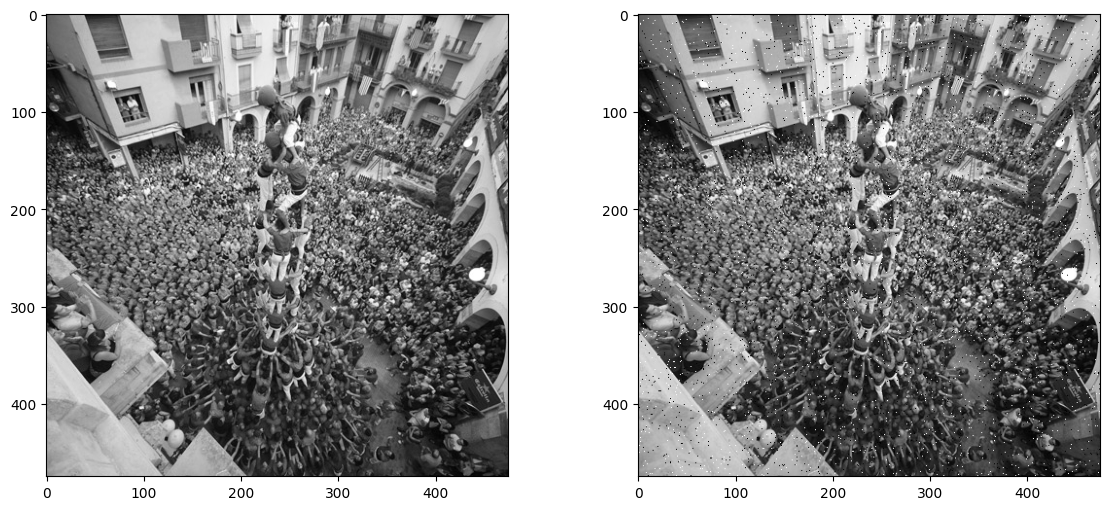

In [35]:
noisy_image[noise>.99]=255
noisy_image[noise<.01]=0

fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(14,6), sharex=True)
ax1.imshow(image_gray, cmap=plt.cm.gray)
ax2.imshow(noisy_image, cmap=plt.cm.gray)

plt.show()


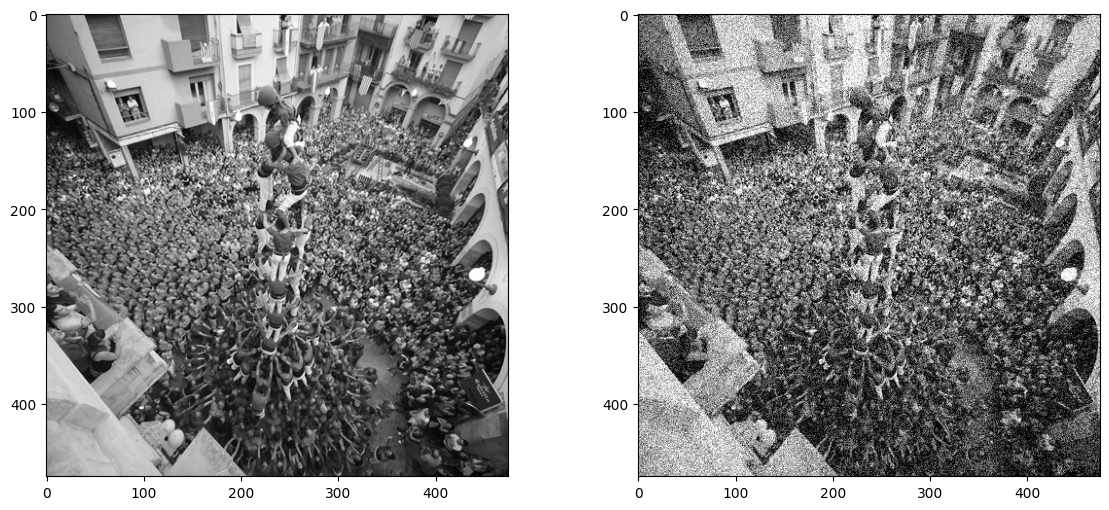

In [49]:
#Gaussian

from skimage import data, img_as_float
from skimage.util import random_noise

img = img_as_float(image_gray)
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

fig, (ax1, ax2)=plt.subplots(ncols=2,figsize=(14,6), sharex=True)
ax1.imshow(img,cmap=plt.cm.gray)
ax2.imshow(noisy_image_normal, cmap=plt.cm.gray)
plt.show()

In [51]:
from skimage.morphology import disk
from skimage.filters import median
from skimage.filters.rank import mean

IG8SP = noisy_image

radius =disk(5)

IG8SPmed = median(IG8SP, radius)

IG8SPmean=mean(IG8SP,radius)

IG8Gmed= mean(img_as_ubyte(noisy_image_normal),radius)



#Dilation Practice


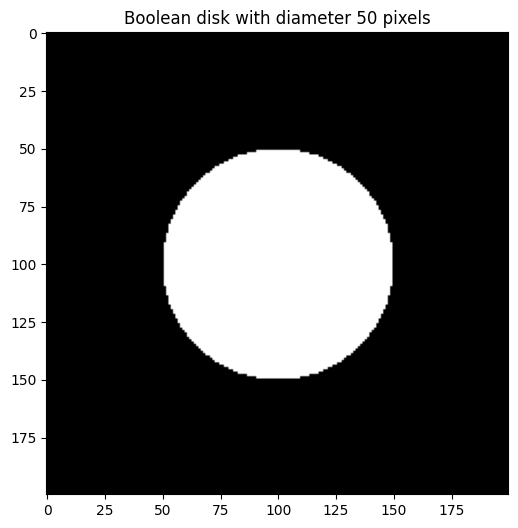

In [52]:
nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < (disk_diameter)**2)

fig = plt.figure(figsize=(6,6))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('Boolean disk with diameter {} pixels'.format(disk_diameter))
plt.show()




In [56]:
from scipy.ndimage import morphology
from skimage.morphology import erosion
from skimage.morphology import dilation

StElement =sk.morphology.diamond(radius=5)

In [57]:
eroded= erosion(outer_disk_mask,StElement)

In [66]:
Dilated =dilation(outer_disk_mask,StElement)

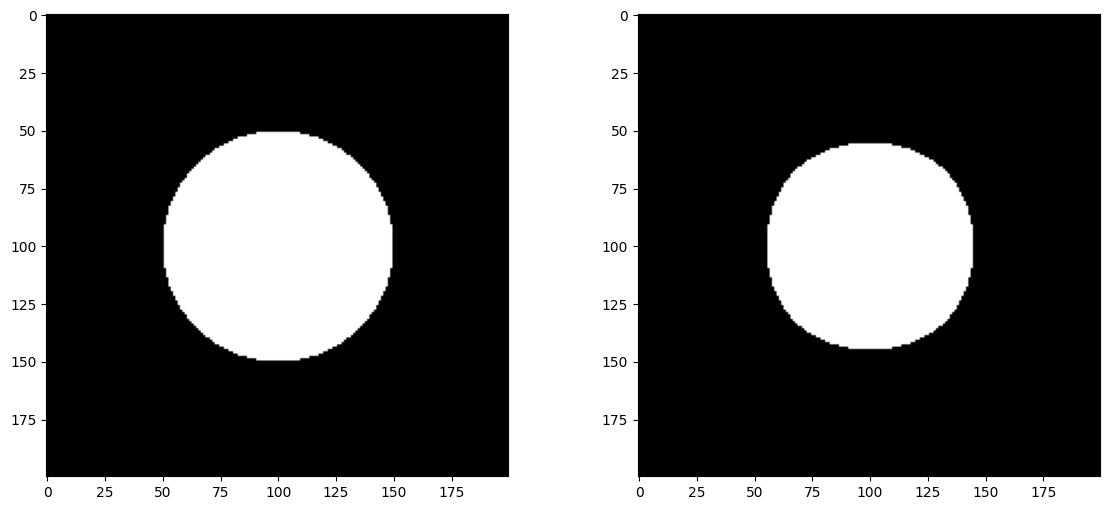

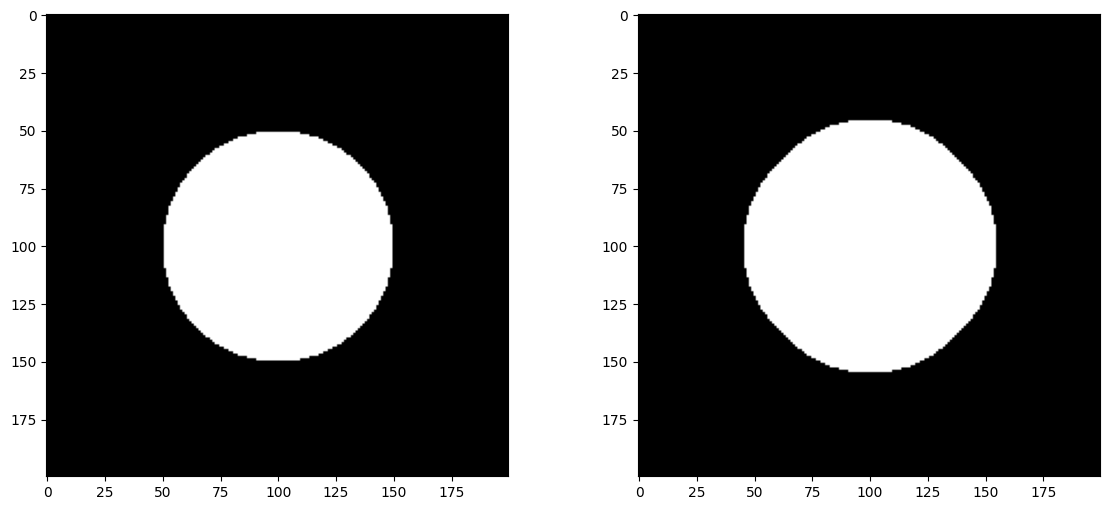

In [67]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(14,6), sharex=True)

ax1.imshow(outer_disk_mask,cmap=plt.cm.gray)
ax2.imshow(eroded,cmap=plt.cm.gray)

plt.show()

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(14,6), sharex=True)

ax1.imshow(outer_disk_mask,cmap=plt.cm.gray)
ax2.imshow(Dilated,cmap=plt.cm.gray)

plt.show()